## Module 4: Manipulating and plotting numbers with Numpy and Matplotlib

### A few necassary words about Modules and packages

Python comes 'out of the box' with a set of built-in commands, which all we've used up until now. But what makes Python so powerful is the availability of many packages that provide waide range of functionalities, including graphics, data analysis, math and science, real-time control, machine learning and much much more. 

Let us quickly review how this is organized, before moving on to talk about two of the most useful packages - numpy and matplotlib.

Every file that contains python definitions and statements (such as functions, constants, classes etc) is a module, that can be imported into any other python code. Once you import a module, you have access to all these defnitions. 

We can simply import a module with the command 
```python
import random
```
We can now use any function or definition in the module random, using the name of the module as a prefix. For example, to access the `randint()` function from the random module (which returns a random integer), we will call it
```python
r = random.randint()
```
Some times the name of a module is too long, and we may want to give it a shortcut: 
```python
import random as rnd
r = rnd.randint()
```

A package is a collection of multiple modules, placed in a directory tree on your disk. Sub directories of the package are known as sub-packages. For example, the package numpy, the fundamental package for scientific computing with Python, has a sub-package linalg which contains linear algebra functions, a sub-package fft which deals with Discrete Fourier Transforms, and more. 

When you import an entire package, you get acess to all functions in its subpackages, but you need to mention them explicitly:
```python
import numpy as np
a_determinant = np.linalg.det(a)
```

You can also import only a subpackage, if you know that that is all you're going to need:
```python
import numpy.linalg
a_determinant = np.linalg.det(a)
```

or even better
```python
import numpy.linalg as la
a_determinant = la.det(a)
```

If all you need is one (or a few) specific things from a package, you can import just that:
```python
from numpy.linalg import det
a_determinant = det(a)
```

Since you just brought `det` into your code, there is no need for any prefix when you call it.

Finally, sometimes useful but also risky, you can bring everything from a package (or sub-package) into your code:
```python
from numpy.linalg import *
a_determinant = det(a)
```

What's the risk? suppose that you have in your code a function called cond. The linalg subpackage also has a function by the same name. Which one will overwrite the other depends on the order of the definition, and can lead to unpredictable results. This is avoided if you use `import numpy.linalg as la', since now _your_ cond is called cond, while the other cond is called la.cond.









## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object (which you can think of as mathematical vectors, matrices and tensors), and tools for working with these arrays. 

Numpy provides all the core functionalities of MATLAB and more. If you are already familiar with MATLAB, you might find this [tutorial](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [1]:
import numpy as np

### Arrays

The most import thing that Numpy provides is the array data data. A numpy array is a grid of values, **all of the same type**. The number of dimensions is called the rank of the array (not to be confused with the linear-algebra definition of a rank); the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, which will give it its initial rank, shape, and values: 

In [2]:
a = np.array([1, 2, 3])        # Create a rank 1 array 
print(a, a.shape,sep='\n')

[1 2 3]
(3,)


In [3]:
b = np.array([[1, 2],[4,5]])   # Creates a 2x2 matrix
print(b, b.shape,sep='\n')

[[1 2]
 [4 5]]
(2, 2)


### How to fill up your array?

You can initialize your array with some standatd ones:

In [4]:
a = np.zeros((3,2))    # Matrix of zeros
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [5]:
b = np.ones((2,3))   # Matrix of ones
print(b)

[[1. 1. 1.]
 [1. 1. 1.]]


In [6]:
c = np.full((2,2), 7) # Create a constant array; the same as 7*np.ones(2,2)
print (c)

[[7 7]
 [7 7]]


In [7]:
d = np.eye(4)          # Identitiy matrix
print(d)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [8]:
e = np.empty((2,2))    # this is just a placeholder 
                       # you should never assume anything about its values.
print(e)

[[1. 1.]
 [1. 1.]]


You can fill up your array with random numbers: (we  talk about other distributions in the Probability module)

In [9]:
f = np.random.random((2,2)) # Create an array filled with uniformly-distributed 
print (f)                   # random values in [0,1); the random sub-package provides 
                            # arrays with many other distributions, see below.

[[0.83117897 0.42764755]
 [0.84412785 0.81623881]]


If you want to fill up your array with a sequence of numbers, there are two ways to do that. `arange` lets you the start, stop and step, just like Python's `range`:

In [10]:
print (np.arange(5))
print (np.arange(2,5))
print (np.arange(2,5,2))

[0 1 2 3 4]
[2 3 4]
[2 4]


In contrast, `linspace` lets you specify the start, stop, and how many equally-spaced elements you want to create in this range.

In [11]:
print (np.linspace(0,5,5))
print (np.linspace(0,5,5,endpoint=False))
print (np.linspace(0,5,11))

[0.   1.25 2.5  3.75 5.  ]
[0. 1. 2. 3. 4.]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


A similar, and very useful, function is `logspace`, which creates a sequence of lograithmicall-spaced numbers in the range 10^start to 10^stop:

In [12]:
print (np.logspace(0,8,3))
print (np.logspace(0,8,5))

[1.e+00 1.e+04 1.e+08]
[1.e+00 1.e+02 1.e+04 1.e+06 1.e+08]


You can also fill up your array from a function:

In [13]:
np.fromfunction(lambda x,y: 10*x+y, (3,4))

array([[ 0.,  1.,  2.,  3.],
       [10., 11., 12., 13.],
       [20., 21., 22., 23.]])

Finally, you can fill up your array from a file. 

Best way to save your array is in a binary format, using
```python
a.save('a_filename')
```
(this will add extension .np to the file name). Use savez instead for a zip-compressed version (with extension .npz). 
You then load these files with 
```python
a = np.load('a_filename.np')
```

You can also read a matrix from a text file with 
```python
np.loadtxt('numbers.txt', dtype='int', delimiter=',',skiprows=1, comments='#')
```
which allows you to skip rows (if you're file has some text before the actual data) or text that comes after the specified comments symbol.



### Array indexing

Numpy offers several ways to index into arrays.

**1. Integer array indexing**: You can access elements in an array using integer indices, just like you did with Python lists. Note that all indices start at 0.

In [14]:
# one-dimensional array

a = np.array([1, 2, 3])  
print (a[0], a[-1],'\n')  # Remember that negative indices count from the end

a[0] = 6
print(a)

1 3 

[6 2 3]


In [15]:
# 2-dimensional array

b = np.array([[1, 2, 3],[4, 5, 6]])  
print (b[0,0], b[1,2], b[1,-1],'\n')      

b[1,2] = 5  
print (b)                  

1 6 6 

[[1 2 3]
 [4 5 5]]


We can use a list (or array) of indices to create a new array from an existing one

In [16]:
b = np.array([[1, 2, 3],[4, 5, 6]])  

c = b[[0, 1],[1,2]]  # this is a one-dimensional array [b[0,1], b[0,2]], not a 2-d array!
print (c,'\n')

# When using integer array indexing, you can reuse the same element from the source array:
print (b[0, [0, 1, 0]])

[2 6] 

[1 2 1]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [17]:
# Create a new array from which we will select elements
a = (np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]]))
print (a,'\n')

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print (a[np.arange(4), b])  # this is [b[0,0],b[1,2],b[2,0],b[3,1]]

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[ 1  6  7 11]


We can use the same trick to change the elements of an array

In [18]:
a [0,[0, 2]] = 2
print(a,'\n')

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print (a)

[[ 2  2  2]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[[12  2  2]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**2. Boolean array indexing**: Boolean array indexing lets you pick out elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. 

In [19]:

a = (np.array([[1,2], [3, 4], [5, 6]]))

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print (a, '\n')
print (bool_idx)

[[1 2]
 [3 4]
 [5 6]] 

[[False False]
 [ True  True]
 [ True  True]]


We use boolean array indexing to construct a rank 1 array consisting of the elements of a corresponding to the True values
of bool_idx

In [20]:
print (a[bool_idx],'\n')

# We can do all of the above in a single concise statement:
print (a[a > 2],'\n')

a[a<4] = -1
print(a)

[3 4 5 6] 

[3 4 5 6] 

[[-1 -1]
 [-1  4]
 [ 5  6]]


**3. Slicing**: Numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [21]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a,'\n')

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2
b = a[:2, 1:3]
print (b,'\n')

# print last 2 rows, first 3 colums:
print(a[-2:,1:])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[[2 3]
 [6 7]] 

[[ 6  7  8]
 [10 11 12]]


*VERY IMPORTANT*: A slice of an array is a view into the same data, so modifying it will modify the original array.

In [22]:
a= np.array([[1,2,3],[4,5,6]])
print(a, '\n')

b = a[1,:]   # b is a slice of a
print(b, '\n')

b[0] = 77    # b[0, 0] is the same piece of data as a[0, 1]

print (a)

[[1 2 3]
 [4 5 6]] 

[4 5 6] 

[[ 1  2  3]
 [77  5  6]]


When we changed that array b, we also changed the array a, becuase b is a slice of a, not an indpendent array. 

This is very different from integer intexing:

In [23]:
a= np.array([[1,2,3],[4,5,6]])
print(a, '\n')

b = a[1,[0,1,2]]  # b is a new array, which copies values from a
print(b, '\n')

b[0] = 77   

print (a)

[[1 2 3]
 [4 5 6]] 

[4 5 6] 

[[1 2 3]
 [4 5 6]]


This time, the array a does not change, because b is a different array.

<!-- <span style='color:green'> -->
<div class="alert alert-block alert-info">


**Now You:** 
1. Create an array A that has the numbers from 12 to 20 (inclusive) in the first row and the numbers from 20 to 60 in skips of 5 in the second. What is the shape of this array? 
2. Create an array B has all the elements in the second row of A except the first and last. Make it such that  B[0]=-1 does not change array A.
3. Create an array C has all the elements in the second row of A except the first and last. Make it such that  C[0]=-1 changes the array A.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [24]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.float64)  # Force a particular datatype

print(x,y,z,sep='\n')
print (x.dtype, y.dtype, z.dtype)


[1 2]
[1. 2.]
[1. 2.]
int64 float64 float64


### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operators and as functions.

In [25]:
M = np.array([[1,2],[3,4]], dtype=np.float64)
K = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print (M + K)
print (np.add(M, K))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [26]:
# Elementwise difference
print (M - K)
print (np.subtract(M, K))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [27]:
# Elementwise product
print (M * K)               # MATLAB USERS - note that this is elementwise multiplication
print (np.multiply(M, K))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [28]:
# Elementwise division
print (M / K)
print (np.divide(M, K))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [29]:
# Elementwise square root
print (np.sqrt(M))

[[1.         1.41421356]
 [1.73205081 2.        ]]


The opreator `*` is elementwise multiplication, not matrix multiplication. 

Numpy provides many useful functions for performing computations on arrays; here are just a few very useful ones:

In [30]:
M = np.array([[1,2],[3,4]])
print(M,'\n')

print (np.sum(M))          # Compute sum of all elements
print (np.sum(M, axis=0))  # Compute sum of each column
print (np.sum(M, axis=1))  # Compute sum of each row

[[1 2]
 [3 4]] 

10
[4 6]
[3 7]


In [31]:
print (np.mean(M, axis=0))  # Compute mean of each column
print (np.std(M, axis=0))   # Compute standard deviation of each column

[2. 3.]
[1. 1.]


In [32]:
print (np.product(M,axis=1)) # Compute product of each row

[ 2 12]


In [33]:
a = np.array([[1,2,3,4,5],[
    2,4,6,8,10]])

print (a.cumsum(axis=1)) # computes all cummulative sums over the columns
                         # same as np.cumsum(a,axis=0)
    
print (a.cumprod(axis=1)) # computes all cummulative products over the columns
                         # same as np.cumprod(a,axis=0)
    

[[ 1  3  6 10 15]
 [ 2  6 12 20 30]]
[[   1    2    6   24  120]
 [   2    8   48  384 3840]]


<!-- <span style='color:green'> -->
<div class="alert alert-block alert-info">


**Now You:**

1. Create an array that has 3 on the diagonal and 5 everywhere else. 
2. Create an 100x3 matrix that contains random numbers unifromly distributed between -2 and 3. Calculat the mean and standard deviations of every row every column.

In [34]:
c = [1,2,3]
print(c)

[1, 2, 3]


### Concatenating and reshaping matrices

### Mathematical functions

Numpy provides many mathematical functions. When you apply these functions to an array, it will calculate the function for each element in the array, and return an array of the results of the same dimensions. 

In [35]:
x = np.linspace(-1,1,5)

print (x,'\n')

# trigonometric functions include sin, cos, tan, arcsin ...
print(np.sin(x))

# hyperbolic functions include sinh, cosh, tanh, arcsinh, ...
print(np.tanh(x))

# rounding functions include round, floor, ceil, rint, ...
print(np.floor(x))

# exponments and lograithms, including exp, exp2, log, log10, ... 
print(np.exp(x))

# and many others, including sqrt, abs, sign, heaviside, ...
print(np.abs(x))


[-1.  -0.5  0.   0.5  1. ] 

[-0.84147098 -0.47942554  0.          0.47942554  0.84147098]
[-0.76159416 -0.46211716  0.          0.46211716  0.76159416]
[-1. -1.  0.  0.  1.]
[0.36787944 0.60653066 1.         1.64872127 2.71828183]
[1.  0.5 0.  0.5 1. ]


In [36]:
# functions of two variables take two arrays of the same size, 
# and pair them element-wise

x1 = np.array([6,6,12])
x2 = np.array([4,3,8])

print(np.divide(x1,x2))
print(np.gcd(x1,x2))

[1.5 2.  1.5]
[2 3 4]


Numpy can also handle complex numbers

In [37]:
z = np.array([2,1 + 2j, 3j])
print(np.real(z),np.imag(z))
print(np.conj(z),np.angle(z))

[2. 1. 0.] [0. 2. 3.]
[2.-0.j 1.-2.j 0.-3.j] [0.         1.10714872 1.57079633]


A complete list of available functions can be found [here](https://numpy.org/doc/stable/reference/routines.math.html)

### Linear Algebra

Numpy provide many powerful linear algebra operations. 

We use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an method of array objects:

In [38]:
M = np.array([[1,2],[3,4]])
K = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors
print (v.dot(w))
print (np.dot(v, w))

219
219


In [39]:
# Matrix / vector product
print (M.dot(v))
print (np.dot(M, v))

[29 67]
[29 67]


In [40]:
# Matrix / matrix product
print (M.dot(K))
print (np.dot(M, K))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


To transpose a matrix, simply use the T attribute of an array object:

In [41]:
print (M)
print (M.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [42]:
v = np.array([[1,2,3]])
print (v) 
print (v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


More advanced linear algebra can be found in the `linalg` subpackage of numpy. Here are some examples:

In [43]:
# compute the norm of a vector
print (np.linalg.norm(v),'\n')

# compute the inverse of a matrix
print (np.linalg.inv(M),'\n')

# the Determinant of a matrix
print (np.linalg.det(M),'\n')

# the Trace of a matrix
print (np.linalg.det(M),'\n')

#Compute the eigenvalues and right eigenvectors of a square matrix.
print(np.linalg.eig(M))

3.7416573867739413 

[[-2.   1. ]
 [ 1.5 -0.5]] 

-2.0000000000000004 

-2.0000000000000004 

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))


The `linalg` pacage also provide some matrix decompositions (QR, SVD) and methods for solving linear equations. You can find out more [here](https://numpy.org/doc/stable/reference/routines.linalg.html).

<!-- <span style='color:green'> -->
<div class="alert alert-block alert-info">


**Now you:**

1. Create a function `rot(t)` that returns a 2x2 rotation matrix at angle t. 
2. Check that a rotation by $3\pi/2$ followed by a rotation by $\pi/2$ leads to an identity matrix.
3. Verify that a rotation by $\pi/3$ does not change the metric of space by calculating the determinant of the corresponding matrix.
4. Create a list that contains the rotations of the vector (-2,3) by $\pi/5, 2\pi/5 ... 2\pi$.

## Numerical computation: roots, minima, and integrals

scipy is the nerdy sister of numpy, providing methods useful in scientific computing such as numerical solutions of equations and integrals, optimization, image processing and more. Here we'll discuss  only the first among these, and return to other functionalities in other modules. 

scipy provides multiple algorithm for numerical solutions of algebratic equations. The wrapper for all these algorithms is the method `root_scalar` untder the optimize sub-module, where you can specify the algorithm you'd like to use. Depending on your algorithm of choice you may need to supply one or two initial guesses, or the first and maybe even the second derivative. You can also control the accepteable tolerance or limit the number of iterations.

In [44]:
from scipy.optimize import root_scalar, minimize_scalar

def f(x):
    return (x - 2) * x * (x + 2)**2

# by default, using the Secant method
root_scalar(f,x0=-3,x1=0.5) # exact answer is 0


      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: -7.577959158745674e-14

In [45]:
# In many cases Brentq is the preferred method, although not really here
root_scalar(f,bracket=[-3,0.5],method='brentq') # exact answer is 0

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: -2.0151772596676697e-18

We can find local minumum using `minimize_sclar`, which again provide interface to several diffent algorithms

In [46]:
minimize_scalar(f)

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458

To solve a system of equation with multiple variable, we can use `roor` for polynomial equations and `fsolve` for non-polynomial equations.

In [47]:
from scipy.optimize import root, fsolve

def f(x):
    return [x[1] - 3*x[0]*(x[0]+1)*(x[0]-1),
            .25*x[0]**2 + x[1]**2 - 1]
sol = root(f, (0.5, 0.5))
print(sol.x)

fsolve(f, (0.5, 0.5))

[1.11694147 0.82952422]


array([1.11694147, 0.82952422])

<span style='color:green'>

**Now you:** Solve the equations $\sin(x)=2y,\cos{x+y}=2$, and find a local minimum  of this function.



## Ploting your data with Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [48]:
import matplotlib.pyplot as plt

By running this special iPython magic, we will be displaying plots inside out notebook (this command is not included if you write a python script): 

In [49]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

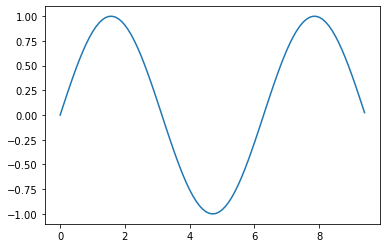

In [50]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

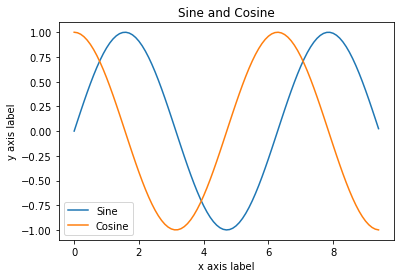

In [51]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

We can easily turn this into a scatter plot:

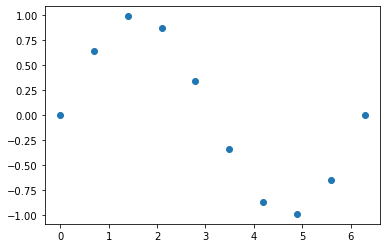

In [52]:
x = np.linspace(0,2 * np.pi,10)
y_sin = np.sin(x)

plt.plot(x,y_sin,'o')

or, even nicer:

<StemContainer object of 3 artists>

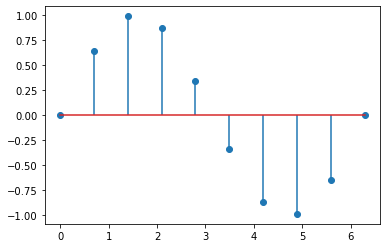

In [53]:
plt.stem(x,y_sin)

Even better, we can manipulate the size and color of each symbol to add more information:

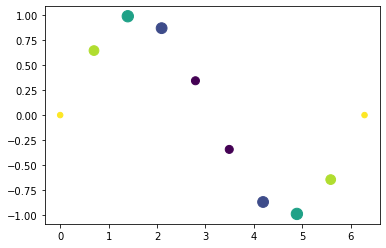

In [54]:
x = np.linspace(0,2 * np.pi,10)
y_sin = np.sin(x)
s_abs = 30+np.abs(y_sin)*100 # will be used below to set marker area, in points**2 
c_cos = np.cos(x)            # will be used to set color; 
                             # colors are picked automatically to reflect the range

plt.scatter(x,y_sin,s=s_abs,c=c_cos)

You can visualize a 2d array in many ways. First, let's show the actual values (witha color bar to see how values are mapped to colors)

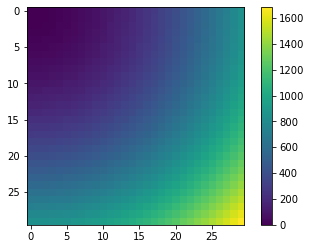

In [55]:
a=np.fromfunction(lambda x,y: x**2+y**2,(30,30))
plt.imshow(a)
plt.colorbar()

Add a color bar, to see how values are mapped to colors

You can play with the colormap choosing one of [many standard maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) (or, if needed, by creating a color map of your own).

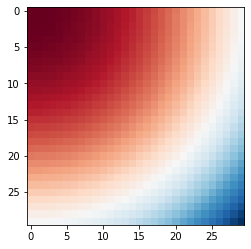

In [56]:
plt.imshow(a,cmap='RdBu')

Or you can create a countour plot. 

(0.0, 29.0, 0.0, 29.0)

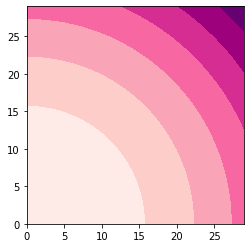

In [57]:
plt.contourf( a, cmap=plt.cm.RdPu)
plt.axis('square')

Finally, let's create some random data sets, and plot their histograms

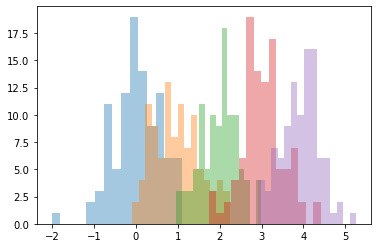

In [58]:
xs = [np.random.normal(mu, 0.5, (100)) for mu in range(5)] # Creates 5 samples from normal distributions with different means
for x in xs:
    plt.hist(x, bins=15, alpha=0.4) # the alpha parameter is what makes the histrograms semi-transparent

### Multiple plots 

You can plot different things in the same figure using the subplot function. Here is an example:

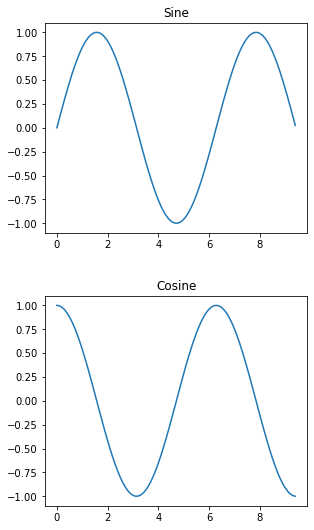

In [59]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1
# f is a handle for the figure; ax is a tuple that holds the different axes
# you can use this oportunity to set some properties of the figure, like it's size
f, ax = plt.subplots(2, 1,figsize=(5,8))

# Make the first plot
ax[0].plot(x, y_sin)
ax[0].set_title('Sine')

ax[1].plot(x, y_cos)
ax[1].set_title('Cosine')

f.tight_layout(pad=3.0) # this provides some space between subplots

You can set many properties of the figure and axes, including the scale (log or linear), the aspect ratio, the location of the grid and more. Here are a couple of example, more info is [here](https://matplotlib.org/3.1.1/api/axes_api.html)

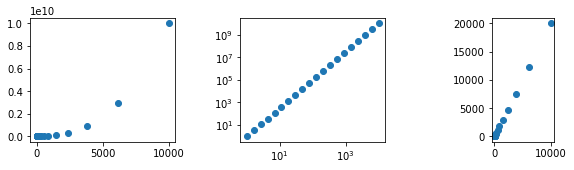

In [60]:
x = np.logspace(0, 4, 20)
y = np.power(x,2.5)

f, ax = plt.subplots(1,3,figsize=(9,3))
ax[0].scatter(x,y)

ax[1].scatter(x,y)
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax[2].scatter(x,2*x)
ax[2].set_aspect('equal',adjustable='box')

f.tight_layout(pad=3.0) # this provides some space between subplots

Some more advanced plotting of data are discussed in Module # (Data handling with Pandas)